In [1]:
#mengimport library yang akan digunakan
import numpy as np #berfungsi untuk memanggil atau memasukkan library numpy yang diinisialisasikan dengan np
import matplotlib.pyplot as plt #berfungsi untuk memanggil atau memasukkan library matplotlib.pyplot yang diinisialisasikan dengan plt
import cv2 as cv #berfungsi untuk memanggil atau memasukkan library cv2 yang diinisialisasikan dengan cv

In [2]:
#membuat function (fungsi) untuk membaca dan mengimport file gambar
def send(image): #membuat fungsi dengan nama send dan parameter image
    img = cv.imread(image) #berfungsi untuk membaca dan menginisialisasi gambar
    rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) #berfungsi untuk mengkonversi gambar img yang semula BGR (blue, green, red) menjadi RGB (red, green, blue)
    
    return rgb #berfungsi untuk mengembalikan nilai dari variabel rgb


In [3]:
#membuat dan menginisialisasi gambar dan dikelompokkan seperti dataset
data = np.array(["MONO.png", "LYMPHO.png", "EOSI.png",
                 "BASO.png", "NEUTRO.png"]) #berfungsi untuk mengelompokkan gambar yang ditentukan di dalamnya dan dijadikan bentuk array (dataset) dan diinisialisasi dengan nama variabel data
dataset = np.array(["MONOCYTE.png", "LYMPHOCYTE.png", "EOSINOPHIL.png",
                    "BASOPHIL.png", "NEUTROPHIL.png"]) #berfungsi untuk mengelompokkan gambar yang ditentukan di dalamnya dan dijadikan bentuk array (dataset) dan diinisialisasi dengan nama variabel dataset

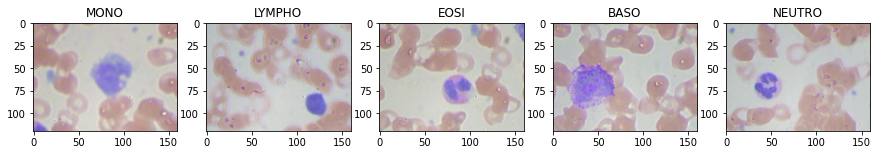

In [8]:
#menampilkan atau memunculkan citra semula (sebelum segmentasi), sekaligus membuat fungsi untuk memunculkan beberapa gambar dengan satu kali print atau satu kali tampil
def comp(isiComp, pil=2): #membuat fungsi dengan nama comp dan dengan dua parameter yaitu isiComp dan pil dan telah diatur dengan nilai 2
    plt.figure(figsize=(15,15)) #mengatur size dari plot gambarnya
    for i in range(len(data)): #melakukan perulangan dengan nilai sepanjang isi dari variabel data
        plt.subplot(1,len(data), i+1)
        plt.title(data[i][:-4])
        if pil == 1: #jika parameter sama dengan 1
            plt.imshow(send(isiComp[i])) #akan memunculkan gambar sesuai aturan pada fungsi send tadinya (citra awal/RGB)
        else: #maka
            plt.imshow(isiComp[i], cmap="gray")

comp(data, 1) #menampilkan hasil deretan citra semula yang sudah dikelompokkan dan definisikan pada variabel data

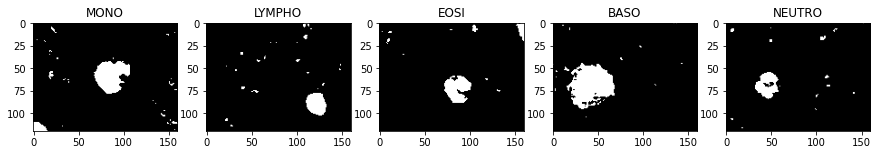

In [9]:
#mengonversi citra semula diatas menjadi hitam putih atau B&W
def convert(image): #membuat fungsi dengan nama convert dan dengan parameter image
    img = send(image) #memanggil fungsi send dan isinya kemudian diinisialisasi dengan nama variabel img
    gambar = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #menginisialisasi lagi dengan nama variabel gambar dan mengaturnya menjadi RGB
    ret, thr = cv.threshold(gambar, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU) #berfungsi untuk memisahkan antara obyek dan background pada citra (digunakan untuk segmentasi warna)
    thr = 255-thr
    return thr #mengembalikan nilai dari variabel thr

m = convert(dataset[0]) #mendefinisikan gambar pada indeks ke-0 pada kumpulan gambar dalam dataset dan di konversi menjadi hitam putih
l = convert(dataset[1]) #mendefinisikan gambar pada indeks ke-1 pada kumpulan gambar dalam dataset dan di konversi menjadi hitam putih
s = convert(dataset[2]) #mendefinisikan gambar pada indeks ke-2 pada kumpulan gambar dalam dataset dan di konversi menjadi hitam putih
b = convert(dataset[3]) #mendefinisikan gambar pada indeks ke-3 pada kumpulan gambar dalam dataset dan di konversi menjadi hitam putih
n = convert(dataset[4]) #mendefinisikan gambar pada indeks ke-4 pada kumpulan gambar dalam dataset dan di konversi menjadi hitam putih

comp([m, l, s, b, n]) #menampilkan hasil deretan gambar yang sudah diinisialisasi tadi dan dideretkan sesuai aturan pada fungsi comp

In [10]:
#mendefinisikan filter kernel
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7)) #mendefinisikan kernel yang digunakan yaitu kernel elips kedalam vaariabel kernel
kernel #print kernel elips

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [11]:
#membuat fungsi operasi dasar dari morfologi
def base(img, kernel, pil): #membuat fungsi dengan nama base dan dengan 3 parameter
    padding = len(kernel)//2 #mendefinisikan variabel padding dengan isi sama dengan panjang nilai dari variabel kernel kemudian di bagi 2
    bar, kol = img.shape #mendefinisikan lebar dan tinggi dari img menjadi bar dan kolom nya
    imageDila = np.pad(np.zeros(img.shape), padding) 
    nol = (kernel == 0).sum() 
    imgEros = np.pad(img, padding) 
    imageEros = np.zeros(img.shape) 
    
    #mendefinisikan operasi dilasi pada morfologi jika variabel pil sama dengan 1 maka gambar tersebut akan dilakukan operasi dilasi
    if pil == 1:
        for i in range(bar):
            for j in range(kol):
                if img[i][j] == 255: 
                    imageDila[i:i+len(kernel), j:j+len(kernel)] += kernel 
        imageDila[imageDila > 0] = 255 
        return imageDila[padding:bar, padding:kol]
    ##mendefinisikan operasi erosi pada morfologi jika variabel pil tidak sama dengan 1 maka gambar tersebut akan dilakukan operasi erosi
    else:
        for i in range(bar):
            for j in range(kol):
                if imgEros[i+padding][j+padding] == 255: 
                    jumlahNol = ((imgEros[i:i+len(kernel), j:j+len(kernel)]*kernel) == 0).sum() 
                    if nol == jumlahNol:
                        imageEros[i][j] = 255 
        return imageEros

In [12]:
#membuat fungsi operasi gabungan dari morfologi (bertujuan untuk melakukan operasi opening dan closing)
def level(img, pil):
    dila = base(img, kernel, 1) #mendefinisikan operasi dilasi yang akan diproses pada operasi gabungan (opening dan closing)
    eros = base(img, kernel, 2) #mendefinisikan operasi erosi yang akan diproses pada operasi gabungan (opening dan closing)
    #menentukan operasi yang akan digunakan pada sebuah gambar/citra
    if pil == 1:
    #jika variabel pil sama dengan 1 makan akan dilakukan operasi opening
        opening = base(eros , kernel, 1)
        return opening
    else:
    #dan jika variabel pil sama dengan 2 makan akan dilakukan operasi closing
        closing = base(dila , kernel, 2)
        return closing

# OPERASI DILASI

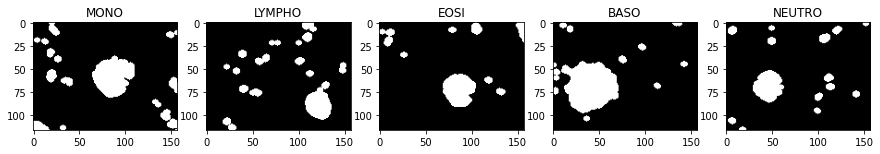

In [10]:
#DILASI
comp([base(m, kernel, 1), base(l, kernel, 1), base(s, kernel, 1), base(b, kernel, 1), base(n, kernel, 1)])
#menampilkan hasil deretan gambar operasi dilasi dan dideretkan sesuai aturan pada fungsi comp

# OPERASI EROSI

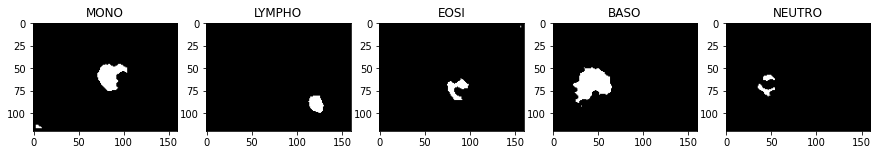

In [11]:
#EROSI
comp([base(m, kernel, 2), base(l, kernel, 2), base(s, kernel, 2), base(b, kernel, 2), base(n, kernel, 2)])
#menampilkan hasil deretan gambar operasi erosi dan dideretkan sesuai aturan pada fungsi comp

# OPERASI OPENING

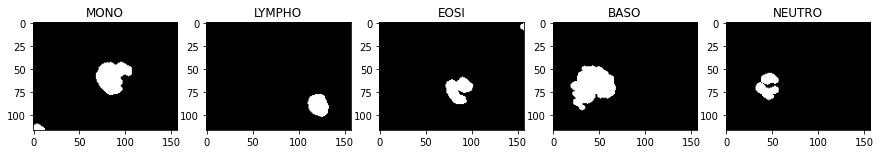

In [12]:
#OPENING
comp([level(m, 1), level(l, 1), level(s, 1), level(b, 1), level(n, 1)])
#menampilkan hasil deretan gambar operasi gabungan opening dan dideretkan sesuai aturan pada fungsi comp

# OPERASI CLOSING

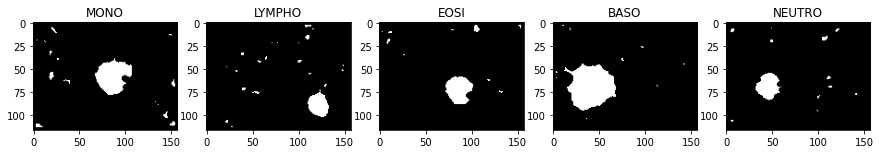

In [13]:
#CLOSING
comp([level(m, 2), level(l, 2), level(s, 2), level(b, 2), level(n, 2)])
#menampilkan hasil deretan gambar operasi gabungan closing dan dideretkan sesuai aturan pada fungsi comp